<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/Partial_Resonant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
! git clone https://github.com/UBC-Astrophysics/QEDSurface.git


fatal: destination path 'QEDSurface' already exists and is not an empty directory.


In [2]:
# change the directory if you have to
import os
os.chdir('QEDSurface/magnetar.py')

In [3]:
#  update just in case
! git pull

Already up to date.


# Load the libraries

In [4]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import Magnetar
import glob

# Load the blackbody surface map

In [5]:
allsurface=Magnetar.surface_model().loaddata(glob.glob('Sample_Atmospheres/B14.11T6.57_h/*.int'))
aa=allsurface.mcolat
# copy the front surface to the back of the star
# add the angles
allsurface.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
allsurface.patches=allsurface.patches+allsurface.patches[::-1]


# Partial Resonant Scattering

In [6]:

for i,m in enumerate(allsurface.patches):
  allsurface.patches[i]=Magnetar.partial_res_comptonization(m,0.151,150)

# Work with a single orientation

## Load the propagation file (pfield)

In [7]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

In [8]:
# Calculate the intensity across the surface at 1.65426 keV as observed
pfield_test.recalculate(1.65426,allsurface,gtt=(1-2*2.0/10.0)**0.5)

(910.3690804970639, -776.8877630789874)

In [9]:
print(allsurface.mcolat)
# print(pfield_test.qmean/pfield_test.imean)

[2.0, 9.0, 18.195, 31.788, 41.41, 49.458, 56.633, 63.256, 69.513, 75.522, 81.373, 98.627, 104.478, 110.487, 116.744, 123.36699999999999, 130.542, 138.59, 148.212, 161.805, 171.0, 178.0]


## Calculate intensities across the image

In [10]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(allsurface,gtt=(1-2*2.0/14.0)**0.5)

## Print the data arrays

In [11]:
print(pfield_test)

#   Phi[rad]  Energy[keV]            I          Q/I
    0.523599     0.316228      711.429    -0.848797
    0.523599     0.331285      717.139    -0.846407
    0.523599      0.34706      719.785    -0.843749
    0.523599     0.363585       719.76    -0.840942
    0.523599     0.380897      717.445    -0.838027
    0.523599     0.399034      713.179    -0.834884
    0.523599     0.418034      707.385    -0.831198
    0.523599      0.43794      700.691    -0.826238
    0.523599     0.458792      693.991    -0.819848
    0.523599     0.480638      688.518    -0.810262
    0.523599     0.503524      685.357    -0.792658
    0.523599       0.5275      685.704    -0.775625
    0.523599     0.552617      690.762     -0.82276
    0.523599      0.57893      701.633    -0.825317
    0.523599     0.606496       719.61    -0.822118
    0.523599     0.635375      745.294    -0.823103
    0.523599     0.665629      778.794    -0.822648
    0.523599     0.697324      818.966    -0.823797
    0.523599

# Let's do some plots

In [12]:
# load the data file
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))


In [13]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
ivec=pfield_test.iint
qvec=pfield_test.qint
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)


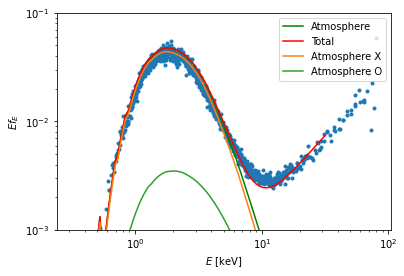

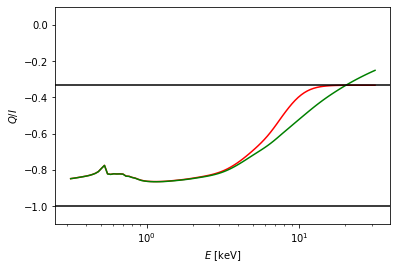

In [14]:
# plot the model against the data
norm=2e4
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/norm,'g',label='Atmosphere')
plt.loglog(ee,totabs*(ivec/norm+ee**1.3/1.2e4),'r',label='Total')
plt.loglog(ee,totabs*0.5*(ivec-qvec)/norm,label='Atmosphere X')
plt.loglog(ee,totabs*0.5*(ivec+qvec)/norm,label='Atmosphere O')
plt.ylim(1e-3,1e-1)
plt.legend()
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4),'r')
plt.plot(ee,qvec/ivec,'g')
plt.axhline(y=-0.33,c='k')
plt.axhline(y=-1,c='k')
plt.xscale("log")
plt.ylim(-1.1,0.1)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$Q/I$')
plt.show()



# Work with all orientations




## Load the orientation files

In [15]:
pfieldarray_test=Magnetar.pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [16]:
pfieldarray_test.calcvalues(allsurface,gtt=(1-2*2.0/14.0)**0.5)

## Print the data arrays

In [17]:
print(pfieldarray_test)

#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228      1105.71  7.79625e-09
           0     0.331285      1134.17  7.83282e-09
           0      0.34706      1157.89  7.87022e-09
           0     0.363585      1176.49  7.90761e-09
           0     0.380897      1189.79   7.9432e-09
           0     0.399034      1197.79  7.97433e-09
           0     0.418034      1200.96  7.99666e-09
           0      0.43794      1199.98  8.00767e-09
           0     0.458792      1195.43   8.0072e-09
           0     0.480638      1187.81  7.99738e-09
           0     0.503524      1177.96  7.97703e-09
           0       0.5275       1166.9  7.94011e-09
           0     0.552617      1156.45  7.87136e-09
           0      0.57893      1148.39  7.74896e-09
           0     0.606496      1144.64  7.49897e-09
           0     0.635375      1146.81  7.47327e-09
           0     0.665629      1157.15  7.68791e-09
           0     0.697324       1177.4  7.45678e-09
           0

## Plot the mean intensity over the orientations

In [18]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

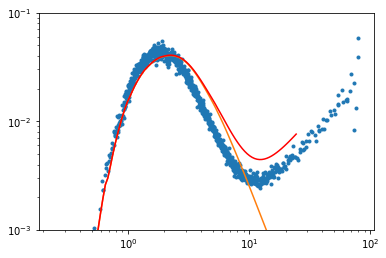

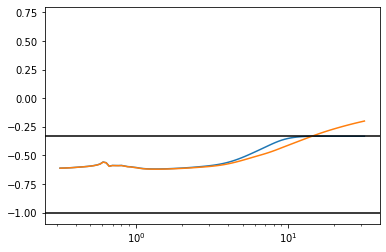

In [19]:
totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*totivec*ee/10e4)
plt.loglog(ee*(1-2*2.0/10.0)**0.5,totabs*(totivec*ee/10e4+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec/10e4)/(totivec/10e4+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.axhline(y=-0.33,c='k')
plt.axhline(y=-1,c='k')
plt.xscale("log")
plt.ylim(-1.1,0.8)
plt.show()

## Plot the intensity for several orientations

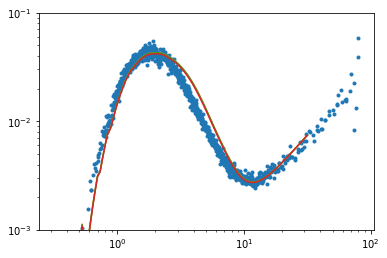

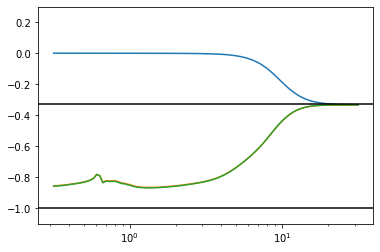

In [20]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]/4e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]/4e4+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]/4e4+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]/4e4)/(ivec[0]/4e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]/4e4)/(ivec[3]/4e4+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]/4e4)/(ivec[6]/4e4+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.axhline(y=-0.33,c='k')
plt.axhline(y=-1,c='k')
plt.xscale("log")
plt.ylim(-1.1,0.3)
plt.show()



NameError: ignored

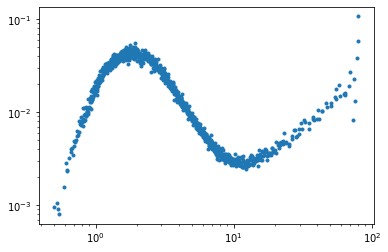

In [21]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=1.9e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iunscat[0]*ee+nscat[0]*ee**4)+totabs*eo**1.3/1.2e4,label='All')
plt.loglog(eo,factor*totabs*(iunscat[3]*ee+nscat[3]*ee**4)+totabs*eo**1.3/1.2e4,label='All')
plt.loglog(eo,factor*totabs*(iunscat[5]*ee+nscat[5]*ee**4)+totabs*eo**1.3/1.2e4,label='All')
#plt.loglog(eo,factor*totabs*(qqunscat*ee+0*nscat*ee**4)+totabs*eo**1.3/1.2e4,label='All')
#plt.loglog(ee*kTe,totabs*factor*nout*ee**4*np.exp(-ee),label='Comptonized BB (abs)')
# plt.loglog(ee*kTe,ee**-2.859376072901842/2e4*np.exp(-ee),label=r'Power-Law $\Gamma=4.85$')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

In [ ]:
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.loglog(datae,dataf,'.',markersize=3)
#factor=1.2e6 # 0.37 keV
factor=1.9e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*((iunscat[0]+iunscat[1]+iunscat[2]+iunscat[3]+iunscat[4]+iunscat[5]+iunscat[6])*ee/7),'k--',label='H atmo in X')
plt.loglog(eo,factor*totabs*((nscat[0]+nscat[1]+nscat[2]+nscat[3]+nscat[4]+nscat[5]+nscat[6])*ee**4/7),'k-.',label='Comptonized O')
plt.loglog(eo,totabs*eo**1.3/1.2e4,'k:',label='PL')
plt.loglog(eo,factor*totabs*((iunscat[0]+iunscat[1]+iunscat[2]+iunscat[3]+iunscat[4]+iunscat[5]+iunscat[6])*ee/7+(nscat[0]+nscat[1]+nscat[2]+nscat[3]+nscat[4]+nscat[5]+nscat[6])*ee**4/7)+totabs*eo**1.3/1.2e4,'r',label='Total',linewidth=2)
plt.loglog([eo[-1],1e2],[eo[-1]**1.3/1.2e4,1e2**1.3/1.2e4],'r',linewidth=2)
#plt.loglog(eo,factor*totabs*(qqunscat*ee+0*nscat*ee**4)+totabs*eo**1.3/1.2e4,label='All')
#plt.loglog(ee*kTe,totabs*factor*nout*ee**4*np.exp(-ee),label='Comptonized BB (abs)')
# plt.loglog(ee*kTe,ee**-2.859376072901842/2e4*np.exp(-ee),label=r'Power-Law $\Gamma=4.85$')
#plt.xlabel(r'$E$ [keV]')
#plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.4,1e2)
plt.ylim(1e-4,1e-1)
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
plt.savefig('CompOsurf.pdf',bbox_inches='tight')
plt.show()

In [ ]:
#plt.semilogx(ee,(nscat*ee**3-qqunscat)/(nscat*ee**3+qqunscat))
plt.semilogx(eo,(factor*totabs*(-iunscat[0]*ee+nscat[0]*ee**4)-totabs*eo**1.3/1.2e4/3)/(factor*totabs*(iunscat[0]*ee+nscat[0]*ee**4)+totabs*eo**1.3/1.2e4),label='All')
plt.semilogx(eo,(factor*totabs*(-iunscat[3]*ee+nscat[3]*ee**4)-totabs*eo**1.3/1.2e4/3)/(factor*totabs*(iunscat[3]*ee+nscat[3]*ee**4)+totabs*eo**1.3/1.2e4),label='All')
plt.xlim(0.5,1e2)
plt.xlabel('Energy [keV]')
plt.ylabel('Q/I')

In [ ]:
allsurface2=Magnetar.surface_model()
allsurface2.loaddata(glob.glob('Sample_Atmospheres/B14.11T6.57_h/*.int'))
aa=allsurface2.mcolat
# add the angles
allsurface2.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
allsurface2.patches=allsurface2.patches+allsurface2.patches[::-1]
newiilist,newqqlist=[],[]
for ii,pp in enumerate(allsurface2.patches):
    print(ii)
    ## calculate mu and kTe for the scattered o-mode from pp
    allsurface2.patches[ii]=Magnetar.rescale_atmo(pp,lambda ee: factor, lambda ee: 0)+ Magnetar.rescale_atmo(Magnetar.compton_bb_atmo(kTe,kTe,mulist[ii],mulist[ii]),lambda ee: 0, lambda ee: factor/3)
    iiint,qqint = allsurface2.patches[ii].fluxIQ(ee)
    print(len(iiint))
    newiilist.append(iiint)
    newqqlist.append(qqint)

In [ ]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=1.9e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iunscat[3]*ee+nscat[3]*ee**4)+totabs*eo**1.3/1.2e4,label='All')
plt.loglog(eo,totabs*newiilist[3]*ee+totabs*eo**1.3/1.2e4)
#plt.loglog(eo,factor*totabs*(qqunscat*ee+0*nscat*ee**4)+totabs*eo**1.3/1.2e4,label='All')
#plt.loglog(ee*kTe,totabs*factor*nout*ee**4*np.exp(-ee),label='Comptonized BB (abs)')
# plt.loglog(ee*kTe,ee**-2.859376072901842/2e4*np.exp(-ee),label=r'Power-Law $\Gamma=4.85$')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

In [ ]:
#plt.semilogx(ee,(nscat*ee**3-qqunscat)/(nscat*ee**3+qqunscat))
plt.semilogx(eo,(factor*totabs*(-iunscat[0]*ee+nscat[0]*ee**4)-totabs*eo**1.3/1.2e4/3)/(factor*totabs*(iunscat[0]*ee+nscat[0]*ee**4)+totabs*eo**1.3/1.2e4),label='All')
plt.semilogx(eo,(newqqlist[0]*ee-eo**1.3/1.2e4/3)/(newiilist[0]*ee+eo**1.3/1.2e4),label='All')
plt.xlim(0.5,1e2)
plt.xlabel('Energy [keV]')
plt.ylabel('Q/I')

In [ ]:
mufil,pfi = [],[]
for i in glob.glob('Sample_Pfields/pfield_models_QED/*'):
    print(i)
    pfii= Magnetar.pfield()
    pfii.loaddata(i)
    pfi.append(pfii)
    mufil.append(float(i.rsplit('_',1)[-1][:2]))

In [ ]:
ind = np.argsort(mufil)
mufil = [mufil[i] for i in ind]
pfi = [pfi[i] for i in ind]
mufil

In [ ]:
ivec,qvec = [],[]
for i in range(len(mufil)):
    print(i)
    iint,qint=[],[]
    for en in ee:
        pfi[i].recalculate(en,allsurface2,gtt=(1-2*2.0/10.0)**0.5)
        iint.append(pfi[i].imean)
        qint.append(pfi[i].qmean)
    ivec.append(iint)
    qvec.append(qint)
ivec = np.array(ivec)
qvec = np.array(qvec)


In [ ]:
totivec = (ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6]+ivec[7])/7
totqvec = (qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6]+ivec[7])/7
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee*1.6e1)
plt.loglog(ee,totabs*(totivec*ee*1.6e1+ee**1.3/1.2e4),'r')
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec*ee*1.6e1)/(totivec*ee*1.6e1+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.5)
plt.show()

In [ ]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec[3]*ee*1.5e1)
plt.loglog(ee,totabs*(ivec[3]*ee*1.5e1+ee**1.3/1.2e4),'r')
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]*ee*1.5e1)/(ivec[3]*ee*1.5e1+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.5)
plt.show()

In [ ]:
pfii=Magnetar.pfield()
pfii.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pfiNQED30=pfii
mufilNQED30=float('Sample_Pfields/pfield_models_noQED/pfield_noQED_30'.rsplit('_',1)[-1][:2])

In [ ]:
iint,qint=[],[]
for en in ee:
    pfiNQED30.recalculate(en,allsurface2,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED30.imean)
    qint.append(pfiNQED30.qmean)
ivecNQED30=iint
qvecNQED30=qint
ivecNQED30 = np.array(ivecNQED30)
qvecNQED30 = np.array(qvecNQED30)

In [ ]:
pfiNQED45=Magnetar.pfield()
pfiNQED45.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_45')

In [ ]:
iint,qint=[],[]
for en in ee:
    pfiNQED45.recalculate(en,allsurface2,gtt=(1-2*2.0/10.0)**0.5)
    iint.append(pfiNQED45.imean)
    qint.append(pfiNQED45.qmean)
ivecNQED45=iint
qvecNQED45=qint
ivecNQED45 = np.array(ivecNQED45)
qvecNQED45 = np.array(qvecNQED45)

In [ ]:
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivecNQED30*ee*1.5e1)
plt.loglog(ee,totabs*(ivecNQED30*ee*1.5e1+ee**1.3/1.2e4),'r')
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)
plt.show()

plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]*ee*1.5e1)/(ivec[3]*ee*1.5e1+ee**1.3/1.2e4),label='with')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED30*ee*1.5e1)/(ivecNQED30*ee*1.5e1+ee**1.3/1.2e4),label='without')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED45*ee*1.5e1)/(ivecNQED45*ee*1.5e1+ee**1.3/1.2e4),label='without')
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.legend()
plt.xlim(0.5,1e2)
plt.ylim(-1.1,0.5)
plt.savefig('comp.pdf',bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)
plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k--', label='H atmo in X')
plt.plot([ee[0],ee[-1]],[1.0,1.0],'k-.',label='Comptonized O')
plt.plot([ee[0],ee[-1]],[-0.33,-0.33],'k:',label='PL')
#plt.plot(ee,(-ee**1.3/1.2e4/3+qvecNQED30*ee*1.5e1)/(ivecNQED30*ee*1.5e1+ee**1.3/1.2e4),'r--',label='Total without QED')
plt.plot(ee,(qvecNQED30*ee*1.5e1)/(ivecNQED30*ee*1.5e1+ee**1.3/1.2e4),label='Total w/o QED')
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]*ee*1.5e1)/(ivec[3]*ee*1.5e1+ee**1.3/1.2e4),'r',label='Total w/ QED',linewidth=2)
#plt.plot(ee,totqvec/totivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.legend()
plt.xlim(0.5,1.0e2)
plt.ylim(-1.1,1.1)
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('CompOQI.pdf',bbox_inches='tight')
plt.show()

In [ ]:
np.savetxt("CompO.txt",np.c_[ee,(-ee**1.3/1.2e4/3+qvec[3]*ee*1.5e1)/(ivec[3]*ee*1.5e1+ee**1.3/1.2e4)])

In [ ]:
pf30=Magnetar.pfield()
pf30.loaddata('Sample_Pfields/pfield_models_noQED/pfield_noQED_30')
pf30.recalculate(2,allsurface2)

In [ ]:
q=pf30.plot(datamap=pf30.data['X']+pf30.data['O'],cmap='inferno',ellipsecolor=None)
q.savefig('CompOmap.pdf',bbox_inches='tight')

In [ ]:
q=pf30.plot(datamap=pf30.data['X'],cmap='inferno',ellipsecolor=None)
q.savefig('CompOmapX.pdf',bbox_inches='tight')

In [ ]:
q=pf30.plot(datamap=pf30.data['O'],cmap='inferno',ellipsecolor=None)
q.savefig('CompOmapO.pdf',bbox_inches='tight')

In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_noQED/pfield_noQED_45


In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_QED/pfield_5keV_30deg


In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_QED/pfield_5keV_60deg


In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_QED/pfield_5keV_30deg Sample_Pfields/pfield_models_QED/pfield_5keV_60deg Sample_Pfields/pfield_models_noQED/pfield_noQED_45

In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_QED/pfield_5keV_75deg  Sample_Pfields/pfield_models_noQED/pfield_noQED_75

In [ ]:
run ../pfield/plotsurfacemap.py Sample_Pfields/pfield_models_QED/pfield_5keV_30deg  Sample_Pfields/pfield_models_noQED/pfield_noQED_30